# Predicting Weekly Dengue Fever Rates in San Juan, Puerto Rico and Iquitos, Peru
## Linear Regression

### Data set up

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('../data/dengue_features_entire.csv')

In [6]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [8]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [9]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

Look at the distribution of the total dengue cases from 1990-2010

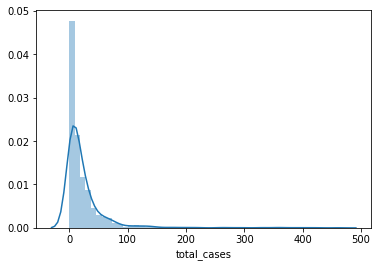

In [10]:
sns.distplot(df['total_cases'])

In [11]:
df.corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1.000000,-0.071649,0.223361,0.144345,0.234234,0.277759,0.205302,-0.140016,0.085043,0.132273,...,0.336349,0.205302,0.161596,0.490542,0.047010,0.373644,0.227320,-0.214482,0.219910,-0.306806
weekofyear,-0.071649,1.000000,0.053548,0.048759,0.121557,0.068701,0.118037,0.425753,0.463677,0.348946,...,-0.015191,0.118037,0.350821,0.077933,0.368408,0.023220,0.232098,0.292362,0.066294,0.216452
ndvi_ne,0.223361,0.053548,1.000000,0.850902,0.614380,0.669504,0.205736,-0.340976,-0.037682,0.056077,...,0.457985,0.205736,0.094852,0.673935,0.186227,0.658129,0.491922,-0.315696,0.242263,-0.241376
ndvi_nw,0.144345,0.048759,0.850902,1.000000,0.555809,0.651938,0.193563,-0.317862,-0.030974,0.063289,...,0.449152,0.193563,0.100626,0.645596,0.203975,0.649483,0.490122,-0.304206,0.221314,-0.202235
ndvi_se,0.234234,0.121557,0.614380,0.555809,1.000000,0.820924,0.074633,-0.157447,0.051348,0.002810,...,0.215606,0.074633,0.028795,0.486047,0.089242,0.449599,0.290691,-0.251621,0.131326,-0.168612
ndvi_sw,0.277759,0.068701,0.669504,0.651938,0.820924,1.000000,0.124047,-0.227824,0.022533,0.020746,...,0.311759,0.124047,0.053437,0.569554,0.121060,0.545899,0.377393,-0.294684,0.158345,-0.196461
precipitation_amt_mm,0.205302,0.118037,0.205736,0.193563,0.074633,0.124047,1.000000,-0.017229,0.106384,0.434722,...,0.499984,1.000000,0.451202,0.201427,0.225408,0.193358,0.296215,0.076680,0.486637,-0.038740
reanalysis_air_temp_k,-0.140016,0.425753,-0.340976,-0.317862,-0.157447,-0.227824,-0.017229,1.000000,0.901777,0.529771,...,-0.402338,-0.017229,0.508380,-0.280375,0.619974,-0.261457,0.227768,0.719612,-0.173851,0.264952
reanalysis_avg_temp_k,0.085043,0.463677,-0.037682,-0.030974,0.051348,0.022533,0.106384,0.901777,1.000000,0.614268,...,-0.168371,0.106384,0.612484,0.124200,0.751330,0.107581,0.512220,0.579864,-0.048052,0.151637
reanalysis_dew_point_temp_k,0.132273,0.348946,0.056077,0.063289,0.002810,0.020746,0.434722,0.529771,0.614268,1.000000,...,0.553766,0.434722,0.997051,-0.033512,0.743506,0.037151,0.492319,0.651535,0.241335,0.142531


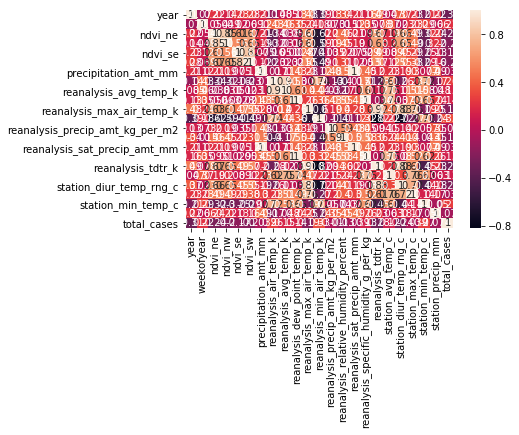

In [12]:
sns.heatmap(df.corr(), annot=True)

## Linear Regression

### Initial linear regression model with the entire set of features (empty cells set as the column median)

Set the training features, deleting the city and week_start_date columns (this will be a combined model of the two cities)

In [13]:
X = df[['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']]

See if there are empty cells (NaN values)

In [14]:
np.any(np.isnan(X))

True

Clean the data to amend the empty cells, or else the model will result in an error. This take, we will set the empty cells equal to the median column value (as opposed to using the mean or mode or tossing the row entirely)

In [15]:
X1 = X.apply(lambda x: x.fillna(x.mean()),axis=0)

Check to ensure that the NaN values are filled in now

In [16]:
X1

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.420000,297.572857,297.742857,292.414286,...,32.000000,73.365714,12.420000,14.012857,2.628571,25.442857,6.900000,29.400000,20.00000,16.00000
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.820000,298.211429,298.442857,293.951429,...,17.940000,77.368571,22.820000,15.372857,2.371429,26.714286,6.371429,31.700000,22.20000,8.60000
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.540000,298.781429,298.878571,295.434286,...,26.100000,82.052857,34.540000,16.848571,2.300000,26.714286,6.485714,32.200000,22.80000,41.40000
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.360000,298.987143,299.228571,295.310000,...,13.900000,80.337143,15.360000,16.672857,2.428571,27.471429,6.771429,33.300000,23.30000,4.00000
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.520000,299.518571,299.664286,295.821429,...,12.200000,80.460000,7.520000,17.210000,3.014286,28.942857,9.371429,35.000000,23.90000,5.80000
5,1990,23,0.142294,0.174850,0.254314,0.181743,9.580000,299.630000,299.764286,295.851429,...,26.490000,79.891429,9.580000,17.212857,2.100000,28.114286,6.942857,34.400000,23.90000,39.10000
6,1990,24,0.112900,0.092800,0.205071,0.210271,3.480000,299.207143,299.221429,295.865714,...,38.600000,82.000000,3.480000,17.234286,2.042857,27.414286,6.771429,32.200000,23.30000,29.70000
7,1990,25,0.072500,0.072500,0.151471,0.133029,151.120000,299.591429,299.528571,296.531429,...,30.000000,83.375714,151.120000,17.977143,1.571429,28.371429,7.685714,33.900000,22.80000,21.10000
8,1990,26,0.102450,0.146175,0.125571,0.123600,19.320000,299.578571,299.557143,296.378571,...,37.510000,82.768571,19.320000,17.790000,1.885714,28.328571,7.385714,33.900000,22.80000,21.10000
9,1990,27,0.142294,0.121550,0.160683,0.202567,14.410000,300.154286,300.278571,296.651429,...,28.400000,81.281429,14.410000,18.071429,2.014286,28.328571,6.514286,33.900000,24.40000,1.10000


In [17]:
np.any(np.isnan(X1))

False

Set the target variable (total_cases)

In [18]:
y = df['total_cases']

Create training data and test data (test size will use 40% of the data, random state specifies a random split)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.4, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X1_train, y1_train)

/Users/annas.kiefer/Desktop/dengue_fever/env/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print(lm.intercept_)

9537.80753226


In [25]:
lm.coef_

array([ -1.80809864e+00,   4.72629387e-01,  -4.82921665e+00,
         1.55945418e+01,  -2.18078855e+01,   2.13619724e+01,
         3.09983543e+13,   3.18432633e+00,  -3.71889492e+00,
        -2.12158455e+01,   4.87172348e-01,  -1.33213630e-01,
        -1.43521749e-02,  -7.79532380e-01,  -3.09983543e+13,
         2.59909072e+01,  -2.13992329e+00,  -1.99180745e+00,
        -2.01703105e+00,   3.32411507e+00,   6.02678513e-01,
        -3.89889554e-03])

In [26]:
X1_train.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [27]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [28]:
cdf

,Coeff
year,-1.808099e+00
weekofyear,4.726294e-01
ndvi_ne,-4.829217e+00
ndvi_nw,1.559454e+01
ndvi_se,-2.180789e+01
ndvi_sw,2.136197e+01
precipitation_amt_mm,3.099835e+13
reanalysis_air_temp_k,3.184326e+00
reanalysis_avg_temp_k,-3.718895e+00
reanalysis_dew_point_temp_k,-2.121585e+01


In [29]:
predictions = lm.predict(X1_test)

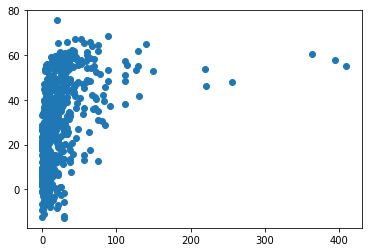

In [30]:
plt.scatter(y1_test, predictions)

In [31]:
from sklearn import metrics

In [32]:
metrics.mean_absolute_error(y1_test, predictions)

19.818637472917217

In [33]:
metrics.mean_squared_error(y1_test, predictions)

1250.449899094808

In [34]:
np.sqrt(metrics.mean_squared_error(y1_test, predictions))

35.361701020946491

### Using all of the features in a linear regression model results in high variance, high bias and a weak linear relationship. <br> <font color="#2bbbad">Perhaps using only one feature will yield better results?</font>

## Creating separate linear regression models for each feature (empty cells are removed)

Drop the rows that contain cells with NaN values

In [36]:
df2 = pd.read_csv('../data/dengue_features_entire.csv')

In [ ]:
df2_without_nans = df2.dropna()

257 rows were dropped as a result of empty cells

In [ ]:
len(df2.index) - len(df2_without_nans.index)

In [ ]:
X2 = df2_without_nans[['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']]

In [ ]:
y = df2_without_nans['total_cases']

In [ ]:
# len(X2.index) == len(y.index)

Write a function that will build a Linear Regression model for each column

In [ ]:
# lr_predictions = {}

In [ ]:
# def create_lr_model(features):
#     """ 
#     Creates a linear model for the given feature set.
#     """
#     print(("Creating linear regression model for {}").format(features.name))
#     lm = LinearRegression()
#     features = features.reshape(-1, 1)
#     X_train, X_test, y_train, y_test = train_test_split(
#         features, y, test_size=0.4, random_state=101)
#     lm.fit(X_train, y_train)
#     predictions = lm.predict(X_test)
#     mean_absolute_error = metrics.mean_absolute_error(y_test, predictions)
#     print(("   mean absolute error = {}").format(mean_absolute_error))
# #     plt.scatter(y_test, predictions)
#     return predictions